In [35]:
# Import requireds librairies and dependencies
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matploblib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
# Read boston dataset
boston = load_boston()
boston

/Users/rodneydavermann/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
# Create features 
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43


In [4]:
# Target variable
Y = pd.DataFrame(boston.target)
Y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [5]:
# Concatenat X and Y for easy manipulation
boston_df = pd.concat([X,Y],axis=1).copy()
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
# Rename the target variable
boston_df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','price']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Wrangling

In [7]:
# Convert to lower case features names
boston_df.columns = boston_df.columns.str.lower()
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
# Check correct data type
boston_df.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
b          float64
lstat      float64
price      float64
dtype: object

In [9]:
# Detect and handling null values
boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [10]:
# Check number of duplicates while ignoring the index feature
n_duplicates = boston_df.drop(labels=['price'], axis=1).duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")
boston_df.shape

You seem to have 0 duplicates in your database.


(506, 14)

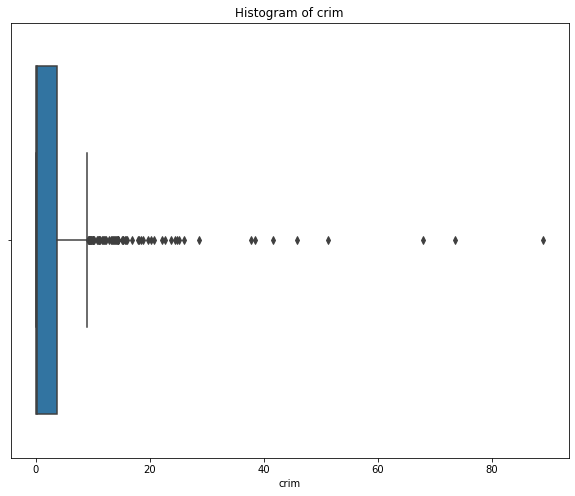

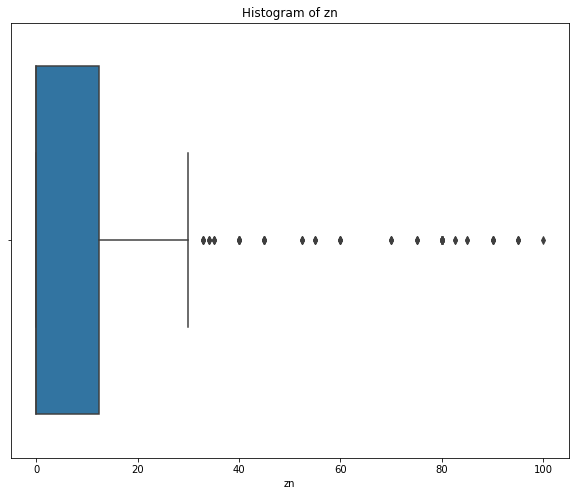

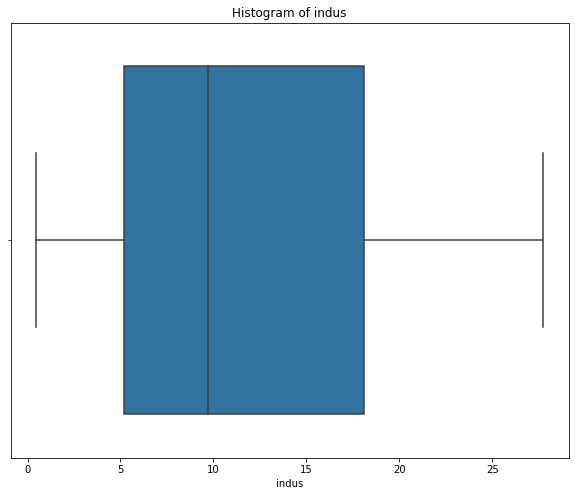

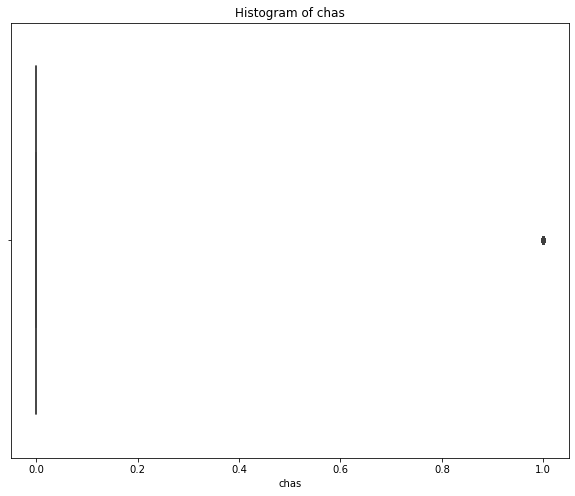

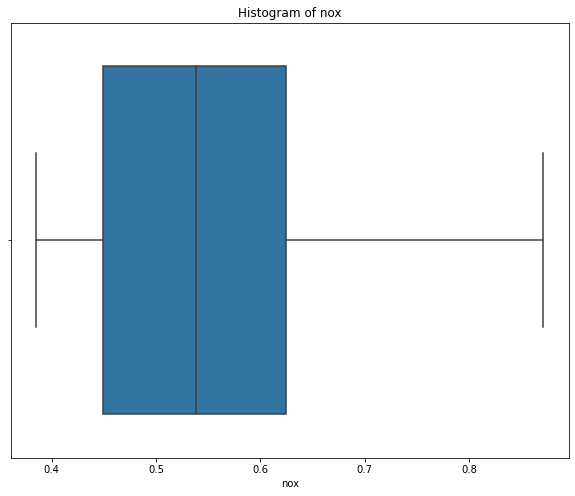

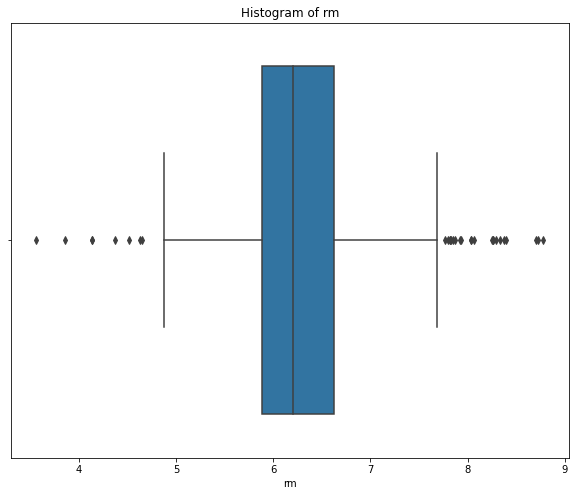

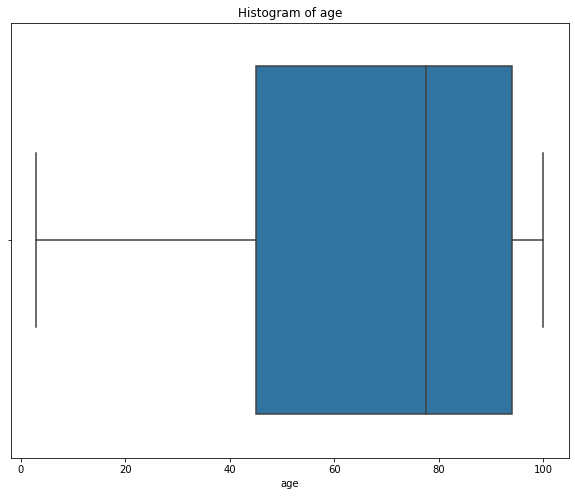

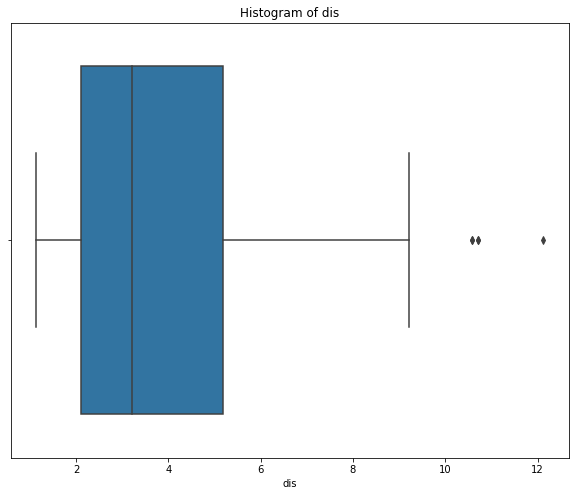

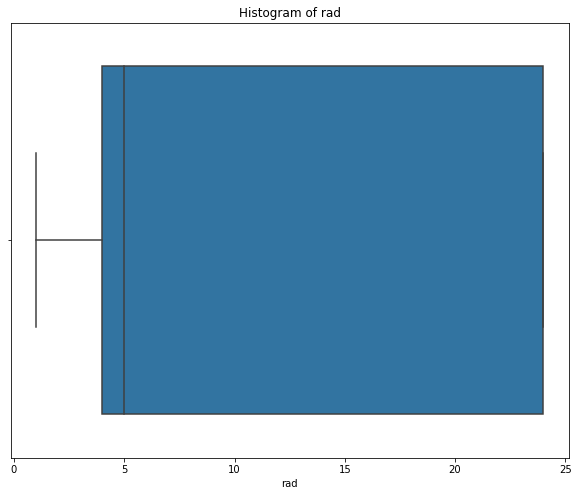

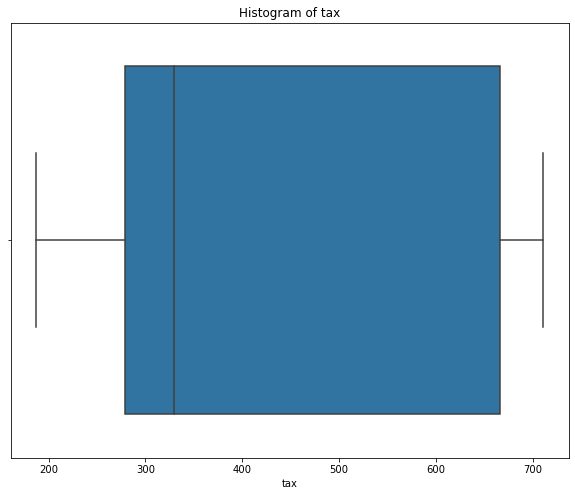

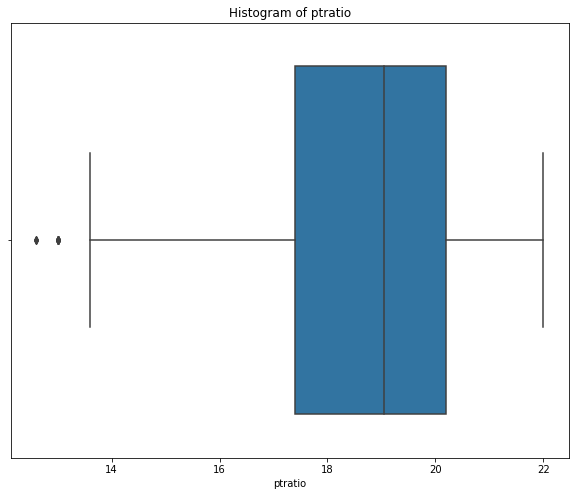

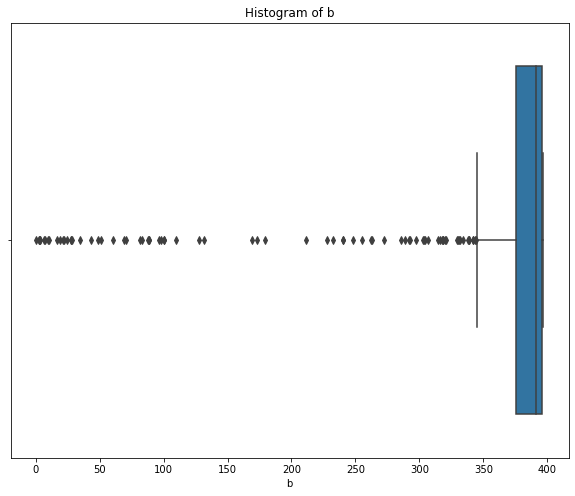

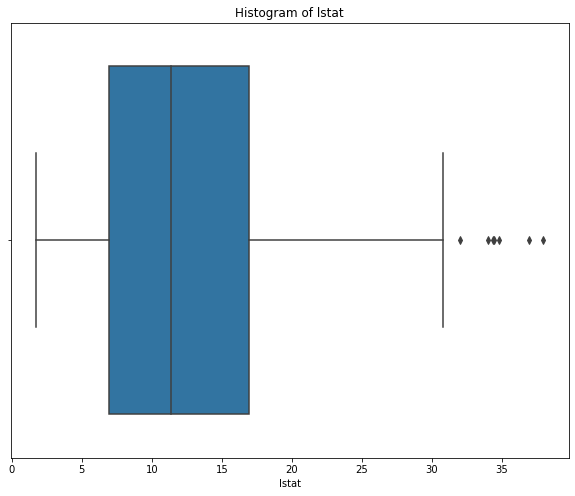

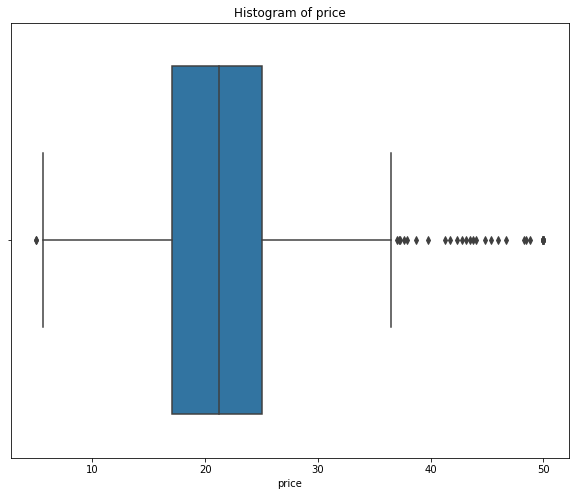

In [11]:
# Detect and handling outliers using boxplot
col_bos = boston_df.columns
for col in col_bos:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=boston_df[col])
    plt.title(f'Histogram of {col}')
    plt.show

In [12]:
# use a copy of Boston dataset
boston_df1 = boston_df.copy()

## Deleting Outliers (Not recommanded with small dataset)

In [13]:
# Write a function to delete outliers from features
#import numpy as np
#def drop_outlier(df,field_name):
    #q1 = (np.percentile(df[field_name],25))
    #q3 = (np.percentile(df[field_name],75))
    #iqr = 1.5 * (q3 - q1)
    #df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name],0.75))].index, inplace = True)
    #df.drop(df[df[field_name] < (np.percentile(df[field_name],25) - iqr)].index, inplace = True)

In [14]:
# Using the above function to delete outliers from crim feature
#drop_outlier(boston_df1,'crim')
#plt.figure(figsize=(10,8))
#sns.boxplot(boston_df1['crim'])
#plt.title(f'Boxplot after dropped Outliers')
#plt.show()

In [15]:
# Using the above function to delete outliers from zn feature
#drop_outlier(boston_df1,'zn')
#plt.figure(figsize=(10,8))
#sns.boxplot(boston_df1['zn'])
#plt.title(f'Boxplot after dropped Outliers')
#plt.show()

In [16]:
# Dataset size after deleting outliers
boston_df1.shape

(506, 14)

## Handling Outliers by Transforming Values Using Box Cox Method

/Users/rodneydavermann/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


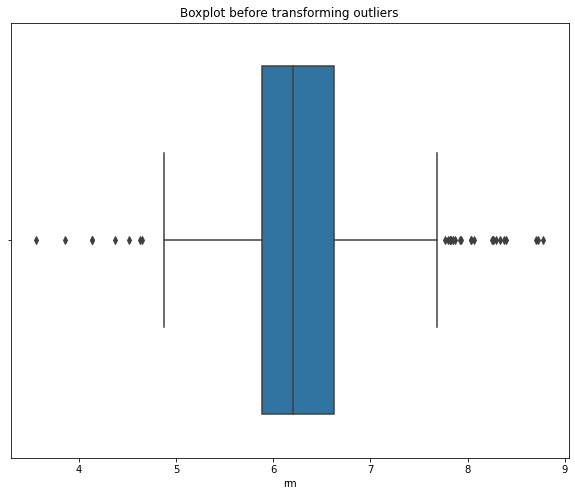

In [18]:
# Box Cox Method

# Draw a boxplot for rm feature
plt.figure(figsize=(10,8))
sns.boxplot(boston_df['rm'])
plt.title('Boxplot before transforming outliers')
plt.show()


/Users/rodneydavermann/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


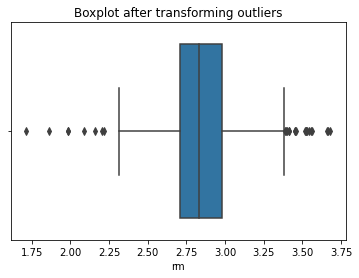

In [19]:
import scipy
#boston_df
boston_df['rm'],fitted_lambda = scipy.stats.boxcox(boston_df['rm'], lmbda = None)
sns.boxplot(boston_df['rm'])
plt.title('Boxplot after transforming outliers')
plt.show()

## Handling Outliers by median imputation

/Users/rodneydavermann/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


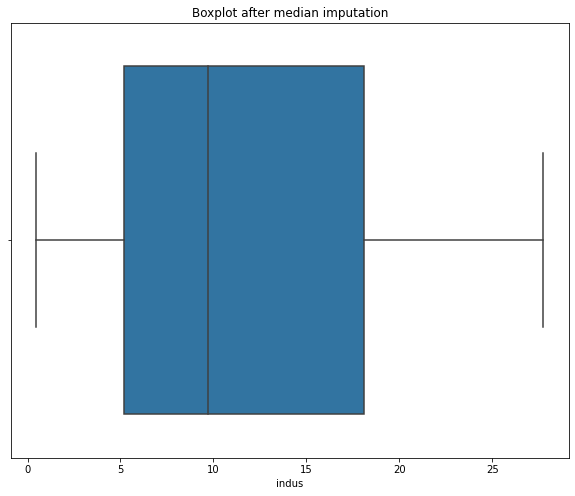

In [24]:
# Write a for loop nestled with a if statement to replace outliers with median  
for i in boston_df['indus']:
    q1 = boston_df['indus'].quantile(0.25)
    q3 = boston_df['indus'].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    
    if i > upper_tail or i < lower_tail:
        boston_df['indus'] = boston_df['indus'].replace(i,boston_df['indus'].median)
plt.figure(figsize=(10,8))
sns.boxplot(boston_df['indus'])
plt.title('Boxplot after median imputation')
plt.show()
    
    

## Build the Linear Regression Model

In [33]:
# Create new features and the target variable
X1 = boston_df.drop(['price'],axis=1)
Y1 = boston_df['price']

In [37]:
# Split the boston dataset using the conventional method
X1_train, X1_test,Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.1, random_state=0) 

In [41]:
# Linear Regression Model
lr_model = linear_model.LinearRegression()

# Fit the model
lr_model_fit = lr_model.fit(X1_train,Y1_train)

# Make prediction
Y_predict = lr_model.predict(X1_test)
Y_predict

array([25.0227461 , 24.05277099, 29.33435232, 12.53019119, 21.53989056,
       19.25897422, 20.99233148, 21.53752704, 18.56092732, 19.43288553,
        5.47894968, 16.56642959, 17.53733279,  5.69729298, 39.48722074,
       32.3424051 , 22.99376562, 36.46014866, 31.11738775, 23.30268172,
       24.95120132, 24.40000568, 20.63333346, 30.40983446, 22.53293884,
        8.62146749, 17.65352141, 17.87529815, 35.29666913, 21.01937962,
       18.86810663, 18.29953136, 19.93309777, 24.11681349, 29.22054106,
       19.5188522 , 11.97804791, 24.73030114, 17.7465822 , 16.05612844,
       26.42365768, 21.11345962, 22.37183244, 15.85492452, 22.91759237,
       25.20710403, 20.2296209 , 22.63703092,  9.73087883, 24.31890122,
       20.38423754])

In [46]:
# Measure model performance

# 1- Mean Absolute Error
MAE = mean_absolute_error(Y1_test,Y_predict)
MAE = round(MAE,5)
print(f'The Mean Absolute Error is: {MAE} \n')

# 2- Root Mean Squared Error
RMSE = np.sqrt(mean_squared_error(Y1_test,Y_predict))
RMSE = round(RMSE,5)
print(f'The Root Mean Squared Error is:{RMSE}')

The Mean Absolute Error is: 4.00682 

The Root Mean Squared Error is:6.45343


## The lower values, the better model.<br>Both values are close to zero meanning that the model performs well on the test dataset.<br>We may use this model to predict house price in Boston. 